In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud , STOPWORDS
%matplotlib inline

In [2]:
#load the dataset
review=pd.read_csv(r"C:\Users\Varsha\Documents\DS\csvfiles\amazon-reviews.csv")
review

,Unnamed: 0,Stars,Comment
0,0,3.0 out of 5 stars,"SUMMERY: As a first time iPhone user, I would ..."
1,1,4.0 out of 5 stars,I purchased this phone for my wife. Last year ...
2,2,4.0 out of 5 stars,Fabulous!
3,3,5.0 out of 5 stars,I had been using iPhone 7 and then I bought th...
4,4,5.0 out of 5 stars,I love IPhone 12 After using iPhone 12 I feel ...
5,5,4.0 out of 5 stars,Everything is under safety controls and every ...
6,6,4.0 out of 5 stars,The media could not be loa...
7,7,4.0 out of 5 stars,Good one
8,8,5.0 out of 5 stars,I have not had any problems with this phone an...
9,9,5.0 out of 5 stars,Battery performance is disgusting. Camera is 4...


In [3]:
review.drop(['Unnamed: 0'],inplace=True,axis=1)
review.head(6)

,Stars,Comment
0,3.0 out of 5 stars,"SUMMERY: As a first time iPhone user, I would ..."
1,4.0 out of 5 stars,I purchased this phone for my wife. Last year ...
2,4.0 out of 5 stars,Fabulous!
3,5.0 out of 5 stars,I had been using iPhone 7 and then I bought th...
4,5.0 out of 5 stars,I love IPhone 12 After using iPhone 12 I feel ...
5,4.0 out of 5 stars,Everything is under safety controls and every ...


# Preprocessing the data

In [4]:
reviews=[comment.strip() for comment in review.Comment] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
reviews[0:10]

['SUMMERY: As a first time iPhone user, I would say one should definitely buy iPhone ONLY for premium built & premium hardware (will talk later) while the whole iOS experience is pretty overrated. iPhones isn\'t any exceptionally fast with normal apps like YouTube, Insta etc, Android phones are equally snappy with them in 2022.PROS:1. Impressive hardware, the heptics, the autobrightness & otherwise highly ignored things in Android are way too perfectly executed in iPhone and it DOES make a big difference in user experience!!2. The screen is AMAZING.. it doesn\'t have 90 or 120 hz refresh rate but it FEELS better than my Nord with 90 hz!!3. A14 bionic promises years of performance ahead.4. Battery life is somewhere in between good & great.5.6. The dimensions of phone, it\'s smaller than usual android phones and feels much more handy along with less weight.7. Overall build quality is great.8. Best audio output out there.9. Long term support.CONS:1. SLOW CHARGING. 20 W only, you\'ll be je

In [5]:
#joining the list into strings
reviews_text=' '.join(reviews)
reviews_text

'SUMMERY: As a first time iPhone user, I would say one should definitely buy iPhone ONLY for premium built & premium hardware (will talk later) while the whole iOS experience is pretty overrated. iPhones isn\'t any exceptionally fast with normal apps like YouTube, Insta etc, Android phones are equally snappy with them in 2022.PROS:1. Impressive hardware, the heptics, the autobrightness & otherwise highly ignored things in Android are way too perfectly executed in iPhone and it DOES make a big difference in user experience!!2. The screen is AMAZING.. it doesn\'t have 90 or 120 hz refresh rate but it FEELS better than my Nord with 90 hz!!3. A14 bionic promises years of performance ahead.4. Battery life is somewhere in between good & great.5.6. The dimensions of phone, it\'s smaller than usual android phones and feels much more handy along with less weight.7. Overall build quality is great.8. Best audio output out there.9. Long term support.CONS:1. SLOW CHARGING. 20 W only, you\'ll be jea

In [6]:
#remove punctuations
no_punc_text = reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'SUMMERY As a first time iPhone user I would say one should definitely buy iPhone ONLY for premium built  premium hardware will talk later while the whole iOS experience is pretty overrated iPhones isnt any exceptionally fast with normal apps like YouTube Insta etc Android phones are equally snappy with them in 2022PROS1 Impressive hardware the heptics the autobrightness  otherwise highly ignored things in Android are way too perfectly executed in iPhone and it DOES make a big difference in user experience2 The screen is AMAZING it doesnt have 90 or 120 hz refresh rate but it FEELS better than my Nord with 90 hz3 A14 bionic promises years of performance ahead4 Battery life is somewhere in between good  great56 The dimensions of phone its smaller than usual android phones and feels much more handy along with less weight7 Overall build quality is great8 Best audio output out there9 Long term supportCONS1 SLOW CHARGING 20 W only youll be jealous of 13rd price phones with 60 W charging Yes

In [7]:
#Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [8]:
from nltk import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['SUMMERY', 'As', 'a', 'first', 'time', 'iPhone', 'user', 'I', 'would', 'say', 'one', 'should', 'definitely', 'buy', 'iPhone', 'ONLY', 'for', 'premium', 'built', 'premium', 'hardware', 'will', 'talk', 'later', 'while', 'the', 'whole', 'iOS', 'experience', 'is', 'pretty', 'overrated', 'iPhones', 'isnt', 'any', 'exceptionally', 'fast', 'with', 'normal', 'apps', 'like', 'YouTube', 'Insta', 'etc', 'Android', 'phones', 'are', 'equally', 'snappy', 'with']


In [9]:
len(text_tokens)

1131

In [10]:
#Remove stopwords
from nltk.corpus import stopwords
my_stop_words = stopwords.words('english')


In [11]:
sw_list =["I","The","It","A"]
my_stop_words.extend(sw_list)

In [12]:
no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['SUMMERY', 'As', 'first', 'time', 'iPhone', 'user', 'would', 'say', 'one', 'definitely', 'buy', 'iPhone', 'ONLY', 'premium', 'built', 'premium', 'hardware', 'talk', 'later', 'whole', 'iOS', 'experience', 'pretty', 'overrated', 'iPhones', 'isnt', 'exceptionally', 'fast', 'normal', 'apps', 'like', 'YouTube', 'Insta', 'etc', 'Android', 'phones', 'equally', 'snappy', '2022PROS1', 'Impressive', 'hardware', 'heptics', 'autobrightness', 'otherwise', 'highly', 'ignored', 'things', 'Android', 'way', 'perfectly', 'executed', 'iPhone', 'DOES', 'make', 'big', 'difference', 'user', 'experience2', 'screen', 'AMAZING', 'doesnt', '90', '120', 'hz', 'refresh', 'rate', 'FEELS', 'better', 'Nord', '90', 'hz3', 'A14', 'bionic', 'promises', 'years', 'performance', 'ahead4', 'Battery', 'life', 'somewhere', 'good', 'great56', 'dimensions', 'phone', 'smaller', 'usual', 'android', 'phones', 'feels', 'much', 'handy', 'along', 'less', 'weight7', 'Overall', 'build', 'quality', 'great8', 'Best', 'audio', 'output',

In [13]:
#Normalize the data
lower_words = [comment.lower() for comment in no_stop_tokens]
lower_words

['summery',
 'as',
 'first',
 'time',
 'iphone',
 'user',
 'would',
 'say',
 'one',
 'definitely',
 'buy',
 'iphone',
 'only',
 'premium',
 'built',
 'premium',
 'hardware',
 'talk',
 'later',
 'whole',
 'ios',
 'experience',
 'pretty',
 'overrated',
 'iphones',
 'isnt',
 'exceptionally',
 'fast',
 'normal',
 'apps',
 'like',
 'youtube',
 'insta',
 'etc',
 'android',
 'phones',
 'equally',
 'snappy',
 '2022pros1',
 'impressive',
 'hardware',
 'heptics',
 'autobrightness',
 'otherwise',
 'highly',
 'ignored',
 'things',
 'android',
 'way',
 'perfectly',
 'executed',
 'iphone',
 'does',
 'make',
 'big',
 'difference',
 'user',
 'experience2',
 'screen',
 'amazing',
 'doesnt',
 '90',
 '120',
 'hz',
 'refresh',
 'rate',
 'feels',
 'better',
 'nord',
 '90',
 'hz3',
 'a14',
 'bionic',
 'promises',
 'years',
 'performance',
 'ahead4',
 'battery',
 'life',
 'somewhere',
 'good',
 'great56',
 'dimensions',
 'phone',
 'smaller',
 'usual',
 'android',
 'phones',
 'feels',
 'much',
 'handy',
 'alo

In [14]:
#lemmatization 
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

summery as first time iphone user would say one definitely buy iphone only premium built premium hardware talk later whole ios experience pretty overrated iphones isnt exceptionally fast normal apps like youtube insta etc android phones equally snappy 2022pros1 impressive hardware heptics autobrightness otherwise highly ignored things android way perfectly executed iphone does make big difference user experience2 screen amazing doesnt 90 120 hz refresh rate feels better nord 90 hz3 a14 bionic promises years performance ahead4 battery life somewhere good great56 dimensions phone smaller usual android phones feels much handy along less weight7 overall build quality great8 best audio output there9 long term supportcons1 slow charging 20 w youll jealous 13rd price phones 60 w charging yes much high charging effect health battery 20 w way way less apple legendary company created battery withstand decently fast charging instead use slow charging keep batterys health2 overy exhagerated softwa

In [15]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['summery', 'as', 'first', 'time', 'iphone', 'user', 'would', 'say', 'one', 'definitely', 'buy', 'iphone', 'only', 'premium', 'build', 'premium', 'hardware', 'talk', 'later', 'whole', 'io', 'experience', 'pretty', 'overrated', 'iphone', 'be', 'not', 'exceptionally', 'fast', 'normal', 'app', 'like', 'youtube', 'insta', 'etc', 'android', 'phone', 'equally', 'snappy', '2022pros1', 'impressive', 'hardware', 'heptic', 'autobrightness', 'otherwise', 'highly', 'ignore', 'thing', 'android', 'way', 'perfectly', 'execute', 'iphone', 'do', 'make', 'big', 'difference', 'user', 'experience2', 'screen', 'amazing', 'do', 'not', '90', '120', 'hz', 'refresh', 'rate', 'feel', 'well', 'nord', '90', 'hz3', 'a14', 'bionic', 'promise', 'year', 'performance', 'ahead4', 'battery', 'life', 'somewhere', 'good', 'great56', 'dimension', 'phone', 'small', 'usual', 'android', 'phone', 'feel', 'much', 'handy', 'along', 'less', 'weight7', 'overall', 'build', 'quality', 'great8', 'good', 'audio', 'output', 'there9', '

In [16]:
clean_reviews=' '.join(lemmas)

In [17]:
clean_reviews

'summery as first time iphone user would say one definitely buy iphone only premium build premium hardware talk later whole io experience pretty overrated iphone be not exceptionally fast normal app like youtube insta etc android phone equally snappy 2022pros1 impressive hardware heptic autobrightness otherwise highly ignore thing android way perfectly execute iphone do make big difference user experience2 screen amazing do not 90 120 hz refresh rate feel well nord 90 hz3 a14 bionic promise year performance ahead4 battery life somewhere good great56 dimension phone small usual android phone feel much handy along less weight7 overall build quality great8 good audio output there9 long term supportcons1 slow charge 20 w you ll jealous 13rd price phone 60 w charge yes much high charge effect health battery 20 w way way less apple legendary company create battery withstand decently fast charge instead use slow charging keep batterys health2 overy exhagerate software experience reality andro

# Feature Extraction

# using Countvectorizer

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [20]:
print(cv.vocabulary_)

{'summery': 315, 'as': 40, 'first': 132, 'time': 332, 'iphone': 178, 'user': 342, 'would': 370, 'say': 281, 'one': 236, 'definitely': 89, 'buy': 60, 'only': 237, 'premium': 256, 'build': 57, 'hardware': 149, 'talk': 323, 'later': 187, 'whole': 363, 'io': 176, 'experience': 117, 'pretty': 257, 'overrated': 244, 'be': 48, 'not': 230, 'exceptionally': 112, 'fast': 126, 'normal': 229, 'app': 38, 'like': 195, 'youtube': 378, 'insta': 174, 'etc': 104, 'android': 34, 'phone': 250, 'equally': 102, 'snappy': 298, '2022pros1': 8, 'impressive': 170, 'heptic': 156, 'autobrightness': 44, 'otherwise': 240, 'highly': 159, 'ignore': 167, 'thing': 330, 'way': 358, 'perfectly': 248, 'execute': 113, 'do': 95, 'make': 204, 'big': 51, 'difference': 91, 'experience2': 118, 'screen': 283, 'amazing': 32, '90': 16, '120': 2, 'hz': 164, 'refresh': 276, 'rate': 269, 'feel': 128, 'well': 360, 'nord': 228, 'hz3': 165, 'a14': 18, 'bionic': 52, 'promise': 261, 'year': 374, 'performance': 249, 'ahead4': 27, 'battery'

In [22]:
print(cv.get_feature_names_out()[150:300])

['have' 'health' 'health2' 'heat' 'heating' 'help' 'heptic' 'hidden'
 'high' 'highly' 'homescreen' 'honest' 'hopefully' 'however' 'hz' 'hz3'
 'if' 'ignore' 'imac' 'imessage' 'impressive' 'inbox' 'india'
 'infingerprint' 'insta' 'instead' 'io' 'ipad' 'iphone' 'iphone12'
 'jealous' 'job' 'junk' 'keep' 'know' 'last' 'late' 'later' 'launch'
 'least' 'leave' 'legendary' 'less' 'life' 'lightning' 'like' 'll' 'load'
 'loading' 'long' 'look' 'lot' 'love' 'main' 'make' 'maker' 'manner'
 'many' 'may' 'medium' 'message' 'mini' 'miss' 'missing5' 'mobile' 'model'
 'money' 'morning' 'mostly' 'moto' 'move' 'much' 'na' 'necessity'
 'negative' 'never' 'nice' 'none' 'nord' 'normal' 'not' 'notification'
 'now' 'number' 'occasional' 'old' 'one' 'only' 'open' 'option'
 'otherwise' 'output' 'overall' 'overpriced' 'overrated' 'overy' 'party'
 'perfect1' 'perfectly' 'performance' 'phone' 'photo' 'picture' 'pixel'
 'poorly' 'positive' 'premium' 'pretty' 'price' 'problem' 'product'
 'promise' 'proper' 'provide'

In [23]:
print(reviewscv.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
print(reviewscv.toarray().shape)

(686, 379)


In [28]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [29]:
print(cv_ngram_range.get_feature_names())

['12', 'amazing', 'android', 'app', 'apple', 'battery', 'be', 'big', 'buy', 'cable', 'charge', 'clear', 'click', 'come', 'could', 'do', 'dual', 'equally', 'especially', 'etc', 'even', 'every', 'everything', 'execute', 'expensive', 'experience', 'facetime', 'fast', 'feel', 'first', 'go', 'good', 'happy', 'hardware', 'have', 'health', 'imessage', 'instead', 'io', 'iphone', 'junk', 'know', 'late', 'least', 'less', 'life', 'lightning', 'like', 'main', 'many', 'may', 'mobile', 'money', 'much', 'nice', 'normal', 'not', 'notification', 'number', 'one', 'only', 'open', 'output', 'overall', 'overpriced', 'performance', 'phone', 'premium', 'pretty', 'problem', 'product', 'provide', 'purchase', 'really', 'safety', 'say', 'seem', 'sim', 'slow', 'snappy', 'so', 'son', 'swipe', 'thing', 'this', 'time', 'uk', 'usba', 'use', 'user', 'very', 'want', 'way', 'well', 'wife', 'work', 'write', 'year', 'yes', 'you']


In [30]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# 

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [32]:
print(tfidfv_ngram_max_features.get_feature_names())


['1100', '12', '120', '13', '13rd', '14', '180', '20', '2022pros1', '27', '3rd', '45', '55900', '56000', '60', '73000', '90', '99', 'a14', 'accessories6', 'activate', 'adapter', 'adcrap', 'add', 'afford', 'after', 'ahead', 'ahead4', 'almost', 'along', 'also', 'always', 'amazing', 'and', 'android', 'anker', 'annoying', 'anytimewhat', 'app', 'apple', 'as', 'at', 'atleast', 'audio', 'autobrightness', 'backup', 'battery', 'batterys', 'be', 'believe', 'belkin', 'big', 'bionic', 'bloatware', 'block', 'bring', 'bug', 'build', 'business', 'but', 'buy', 'by', 'cable', 'camera', 'can', 'case', 'charge', 'charger', 'charging', 'cheap', 'clean', 'clear', 'click', 'colitis', 'come', 'commonsense', 'company', 'control', 'correct', 'cost', 'could', 'crap', 'crappy', 'create', 'currently', 'customisation', 'cuz', 'day', 'decently', 'definitely', 'device', 'difference', 'difficulty', 'dimension', 'disgusting', 'do', 'dual', 'effect', 'else', 'email', 'end', 'engineer', 'equally', 'especially', 'etc', '

In [33]:
print(tfidf_matrix_ngram.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [34]:
#define a function to plot wordcloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

In [38]:
#Generate wordcloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)

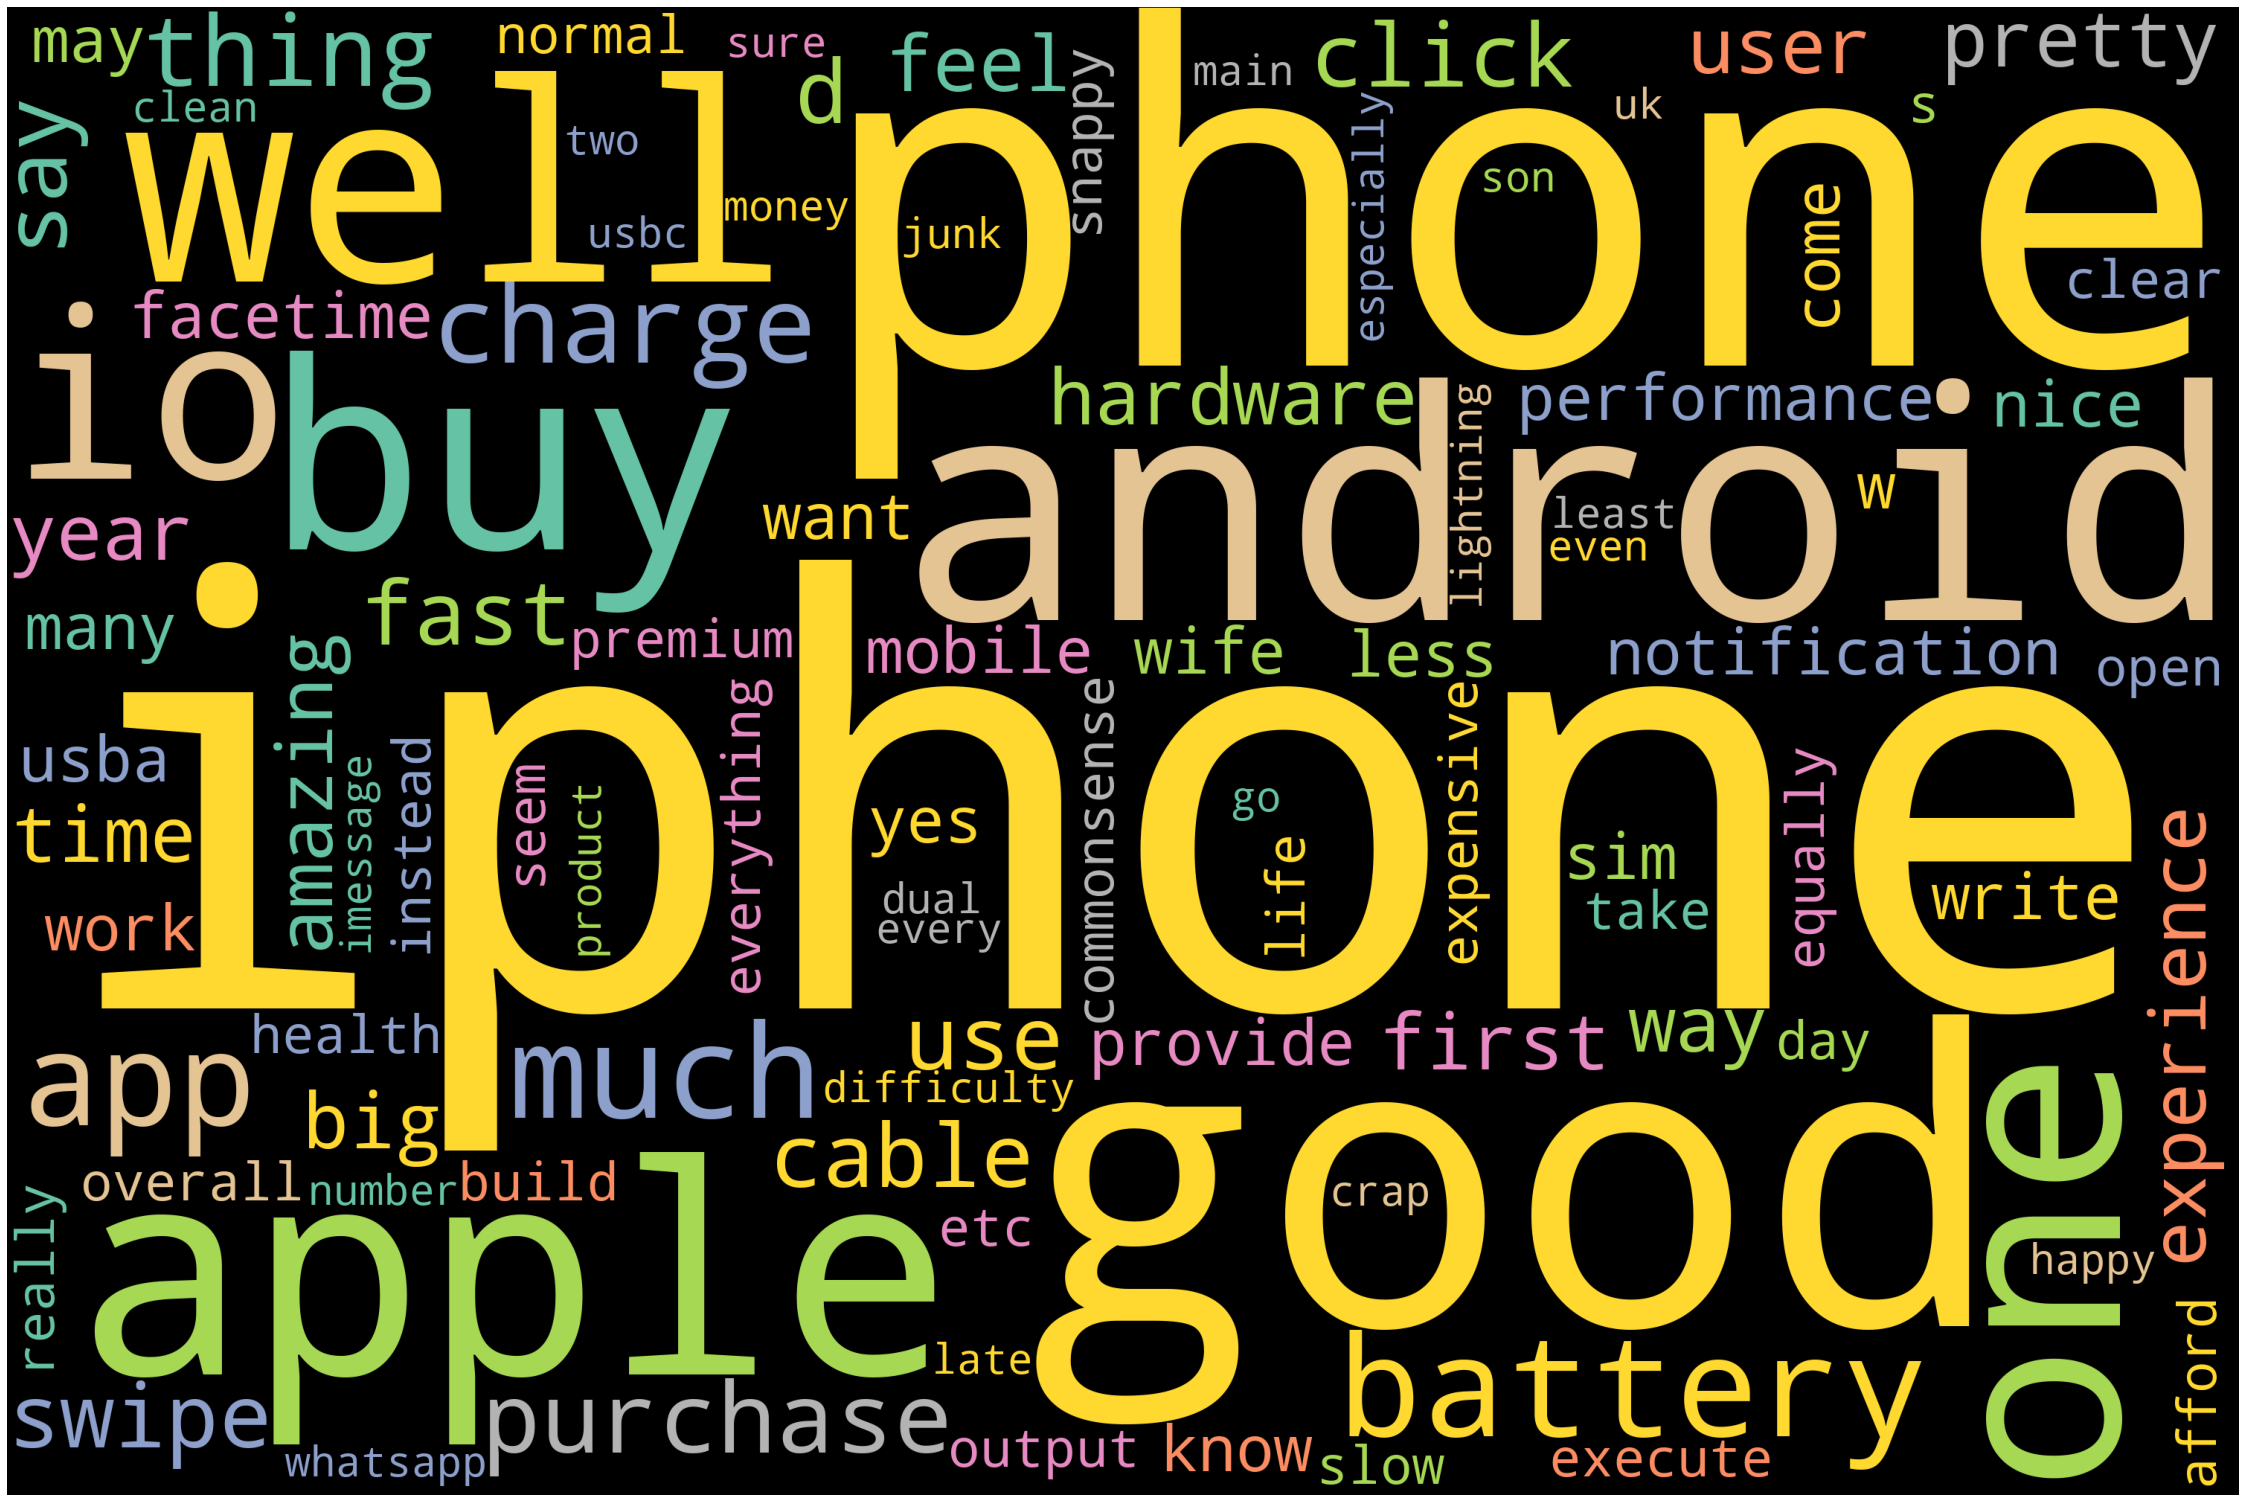

In [39]:
plot_cloud(wordcloud)

In [40]:
#Parts of Speech(pos) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [42]:
for token in doc_block[100:250]:
    print(token,token.pos_)

good ADJ
audio ADJ
output NOUN
there9 NOUN
long ADJ
term NOUN
supportcons1 NOUN
slow ADJ
charge NOUN
20 NUM
w ADP
you PRON
ll AUX
jealous VERB
13rd ADJ
price NOUN
phone NOUN
60 NUM
w NOUN
charge NOUN
yes INTJ
much ADJ
high ADJ
charge NOUN
effect NOUN
health NOUN
battery NOUN
20 NUM
w NUM
way NOUN
way NOUN
less ADJ
apple PROPN
legendary ADJ
company NOUN
create VERB
battery NOUN
withstand NOUN
decently ADV
fast ADJ
charge NOUN
instead ADV
use VERB
slow ADJ
charging NOUN
keep VERB
batterys PROPN
health2 PROPN
overy ADJ
exhagerate NOUN
software NOUN
experience NOUN
reality NOUN
android VERB
user NOUN
friendly ADJ
well ADV
gesture ADJ
commonsense NOUN
option NOUN
setting VERB
step NOUN
simple ADJ
thing NOUN
io NOUN
look VERB
pretty ADV
yes INTJ
ux ADP
engineer NOUN
apple NOUN
really ADV
do VERB
crappy ADJ
job NOUN
there PRON
s VERB
still ADV
notification NOUN
group NOUN
correct ADJ
manner NOUN
execute VERB
poorly ADV
proper ADJ
homescreen NUM
customisation NOUN
many ADJ
commonsense NOUN
thi

In [43]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['miss', 'day', 'android', 'click', 'swipe', 'take', 'swipe', 'click', 'sooooo', 'want', 'notification', 'swipe', 'click', 'want', 'notification', 'swipe', 'click', 'believe', 'apple', 'scream', 'speed', 'android', 'phone', 'performance', 'today', 'split', 'app', 'loading', 'time', 'io', 'android', 'io', 'have', 'bug', 'app', 'take', 'time', 'etc4', 'reader', 'seem', 'atleast', 's', 'missing5', 'accessories6', 'battery', 'life', 'greatin', 'end', 'say', 'iphone', 'provide', 'experience', 'hardware', 'know', 'buy', 'valueformoney', 'phone', 'buy', 'afford', 'difficulty', 'purchase', 'phone', 'wife', 'year', 'purchase', 'go', 'buy', 'iphone', 'thing', 'like', 'phone', 'crap', 'bloatware', 'maker', 'put', 'come', 'stock', 'android', 'leave', 'want', 'phone', 'wife', 'facetime', 'say', 'write', 'write', 'write', 'product', 'perfect1', 'bring', 'junk', 'phone', 'switch', 'android', 'iphone', 'move', 'io', 'help', 'android', 'phone']


In [44]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,iphone,15
1,phone,14
2,buy,8
3,android,8
4,apple,8
5,battery,6
6,charge,6
7,io,5
8,app,5
9,thing,5


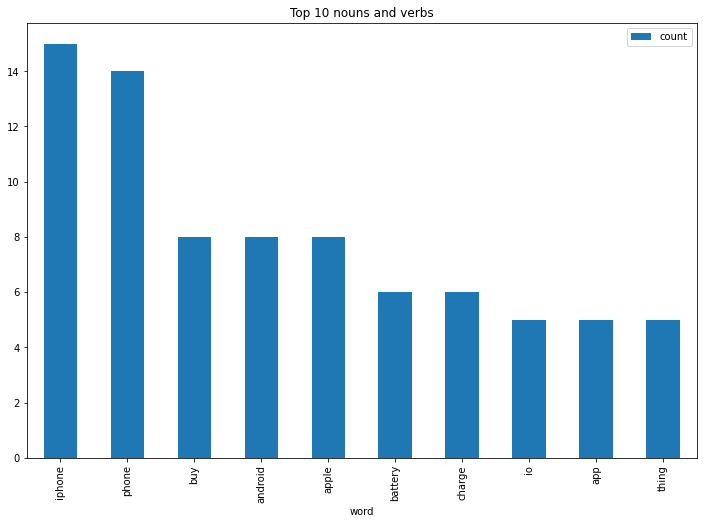

In [45]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

In [46]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

['SUMMERY: As a first time iPhone user, I would say one should definitely buy iPhone ONLY for premium built & premium hardware (will talk later) while the whole iOS experience is pretty overrated.',
 "iPhones isn't any exceptionally fast with normal apps like YouTube, Insta etc, Android phones are equally snappy with them in 2022.PROS:1.",
 'Impressive hardware, the heptics, the autobrightness & otherwise highly ignored things in Android are way too perfectly executed in iPhone and it DOES make a big difference in user experience!!2.',
 "The screen is AMAZING.. it doesn't have 90 or 120 hz refresh rate but it FEELS better than my Nord with 90 hz!!3.",
 'A14 bionic promises years of performance ahead.4.',
 'Battery life is somewhere in between good & great.5.6.',
 "The dimensions of phone, it's smaller than usual android phones and feels much more handy along with less weight.7.",
 'Overall build quality is great.8.',
 'Best audio output out there.9.',
 'Long term support.CONS:1.',
 'SL

In [47]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,"SUMMERY: As a first time iPhone user, I would ..."
1,iPhones isn't any exceptionally fast with norm...
2,"Impressive hardware, the heptics, the autobrig..."
3,The screen is AMAZING.. it doesn't have 90 or ...
4,A14 bionic promises years of performance ahead.4.
...,...
73,Camera is 4/5.
74,Gaming amazing.
75,Heat up so much.
76,Everytime heating problem comes out.


In [50]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [51]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [52]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [53]:
# manual testing
calculate_sentiment(text='good service')

3

In [54]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0     1
1     2
2     6
3     4
4     1
     ..
73    0
74    4
75    0
76   -2
77    0
Name: sentiment_value, Length: 78, dtype: int64

In [55]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0     33
1     21
2     30
3     23
4      7
      ..
73     3
74     2
75     4
76     5
77     7
Name: word_count, Length: 78, dtype: int64

In [56]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
14,iOS looks pretty yes but UX engineers at Apple...,-5,49
20,DON'T believe Apple fanboys who scream about s...,-2,16
76,Everytime heating problem comes out.,-2,5
41,"Be sure to clean the SMS inbox also, especiall...",-2,29
15,Everything you can do in Android with a single...,-2,26
...,...,...,...
23,FaceID is nice but an in-fingerprint reader se...,6,16
67,iPhone of any model is always good but this is...,6,12
2,"Impressive hardware, the heptics, the autobrig...",6,30
72,The product is good for business and work but ...,15,85


In [57]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    78.000000
mean      1.307692
std       3.506238
min      -5.000000
25%       0.000000
50%       0.000000
75%       2.000000
max      22.000000
Name: sentiment_value, dtype: float64

In [58]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
6,"The dimensions of phone, it's smaller than usu...",0,19
7,Overall build quality is great.8.,0,5
10,SLOW CHARGING.,0,2
11,"20 W only, you'll be jealous of 1/3rd price ph...",-2,14
14,iOS looks pretty yes but UX engineers at Apple...,-5,49
15,Everything you can do in Android with a single...,-2,26
20,DON'T believe Apple fanboys who scream about s...,-2,16
24,Ridiculously expensive accessories6.,0,3
26,Do know that you're NOT buying a value-for-mon...,0,23
27,I purchased this phone for my wife.,0,7


In [59]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,"SUMMERY: As a first time iPhone user, I would ...",1,33
1,iPhones isn't any exceptionally fast with norm...,2,21
2,"Impressive hardware, the heptics, the autobrig...",6,30
3,The screen is AMAZING.. it doesn't have 90 or ...,4,23
4,A14 bionic promises years of performance ahead.4.,1,7
5,Battery life is somewhere in between good & gr...,3,9
8,Best audio output out there.9.,3,5
9,Long term support.CONS:1.,2,3
12,Yes that much high charging will effect health...,1,49
13,"Overy exhagerated software experience, reality...",2,26


In [60]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,"SUMMERY: As a first time iPhone user, I would ...",1,33,0
1,iPhones isn't any exceptionally fast with norm...,2,21,1
2,"Impressive hardware, the heptics, the autobrig...",6,30,2
3,The screen is AMAZING.. it doesn't have 90 or ...,4,23,3
4,A14 bionic promises years of performance ahead.4.,1,7,4
...,...,...,...,...
73,Camera is 4/5.,0,3,73
74,Gaming amazing.,4,2,74
75,Heat up so much.,0,4,75
76,Everytime heating problem comes out.,-2,5,76


C:\Users\Varsha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

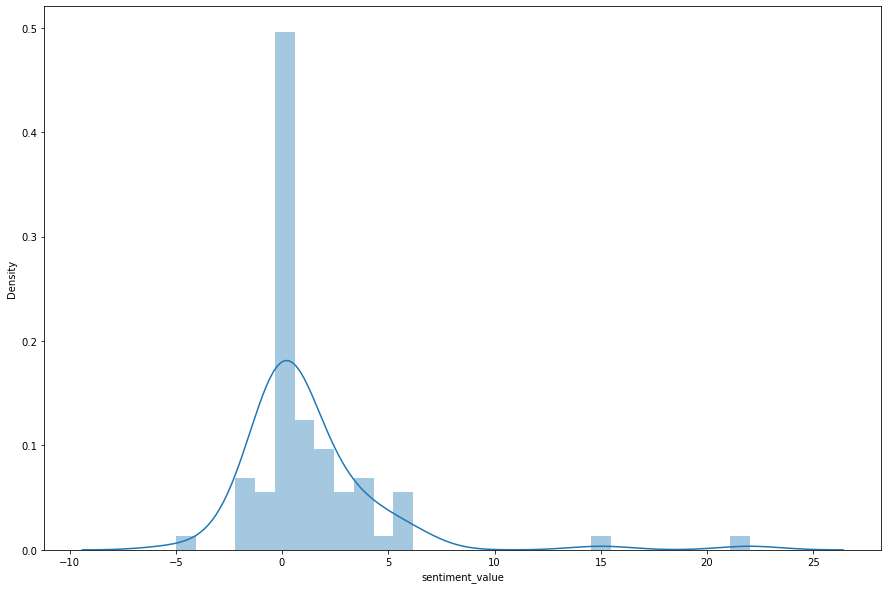

In [61]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

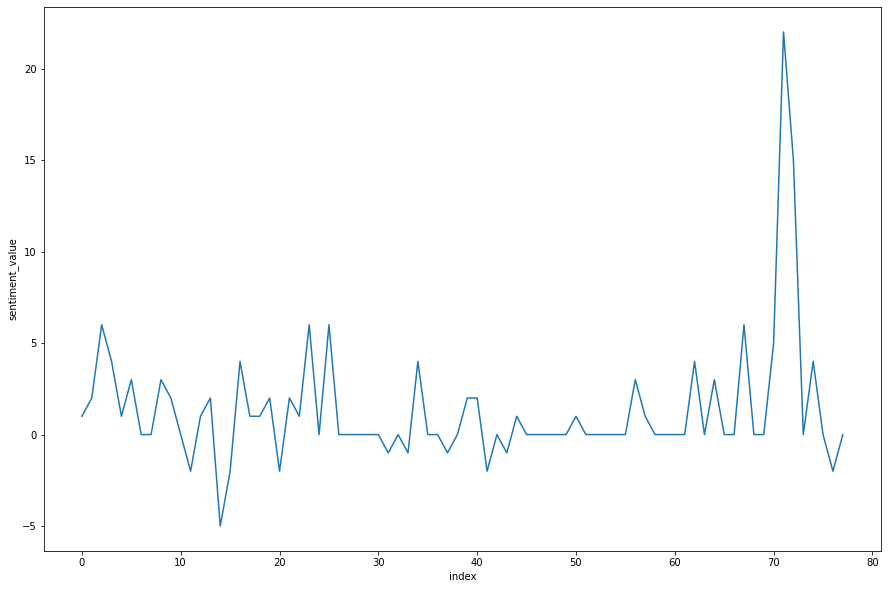

In [62]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)